<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/Copy_of_Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from zipfile import ZipFile
import collections

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


In [ ]:
!git clone https://github.com/ishaak15/UNSW-IDS-Feature-Selection.git

Cloning into 'UNSW-IDS-Feature-Selection'...
remote: warning: multi-pack bitmap is missing required reverse index
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 103 (delta 54), reused 35 (delta 20), pack-reused 0
Receiving objects: 100% (103/103), 40.30 MiB | 18.90 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
cd UNSW-IDS-Feature-Selection/

/content/UNSW-IDS-Feature-Selection


In [ ]:
ls

bayes_10.sav   clfKNN_all.sav                      Testset1.csv
bayes_20.sav   Copy_of_Training_and_Testing.ipynb  Testset2.csv
bayes_all.sav  Dataset1.csv                        Testset3.csv
clfDT_10.sav   Dataset2.csv                        Training_and_Testing.ipynb
clfDT_20.sav   Dataset3.csv                        UNSW_IDS_analysis.ipynb
clfDT_all.sav  LICENSE                             UNSW_NB15_testing-set.csv
clfKNN10.sav   Models_Training_and_Testing.ipynb
clfKNN20.sav   README.md


In [ ]:
df1 = pd.read_csv('Dataset1.csv',index_col=0)
df2 = pd.read_csv('Dataset2.csv',index_col=0)
df3 = pd.read_csv('Dataset3.csv',index_col=0)

In [ ]:
tf1 = pd.read_csv('Testset1.csv',index_col=0)
tf2 = pd.read_csv('Testset2.csv',index_col=0)
tf3 = pd.read_csv('Testset3.csv',index_col=0)

In [ ]:
df1_xtrain=df1.iloc[: , :-1]
df1_ytrain=df1.iloc[:,-1]
df2_xtrain=df2.iloc[: , :-1]
df2_ytrain=df2.iloc[:,-1]
df3_xtrain=df3.iloc[: , :-1]
df3_ytrain=df3.iloc[:,-1]

In [ ]:
df1_xtest=tf1.iloc[: , :-1]
df1_ytest=tf1.iloc[:,-1]
df2_xtest=tf2.iloc[: , :-1]
df2_ytest=tf2.iloc[:,-1]
df3_xtest=tf3.iloc[: , :-1]
df3_ytest=tf3.iloc[:,-1]

In [ ]:
#KNN

In [ ]:
clfKNN10=neighbors.KNeighborsClassifier()
clfKNN10.fit(df1_xtrain,df1_ytrain)
#clfKNN10.fit(df1_xtrain,df1_ytrain)

print ("\t\tKNN Classification of UNSW-NB15\n\n\t\tTop 15 Features ")

yt_pred_10 = clfKNN10.predict(df1_xtest)
results = confusion_matrix(df1_ytest, yt_pred_10) 
print ('Confusion Matrix :')
print(results) 


accKNN10=accuracy_score(df1_ytest,yt_pred_10)
print("Accuracy: ",accKNN10)
preKNN10=precision_score(df1_ytest, yt_pred_10, average='macro')
print("Precision Score: ",preKNN10)
f1KNN10=f1_score(df1_ytest, yt_pred_10, average='macro')
print("F1 Score: ",f1KNN10)
reKNN10=recall_score(df1_ytest, yt_pred_10, average='macro')  
print("Recall: ",reKNN10)


		KNN Classification of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  208   131    42    58   129    16    32    61     0     0]
 [  198   121    13    49   134    18    16    33     1     0]
 [  822   758   472   913   502    21   202   372    27     0]
 [  955   835   503  6664   944    39   616   540    33     3]
 [  444   315    97   469  3357    54  1111   164    50     1]
 [   17    11    34   375   168 18078   140    44     4     0]
 [  496    52   218  1986  7076    20 26822   233    93     4]
 [   82   102    51   324   117     5    71  2737     5     2]
 [    5     7    12    50   161     6    51    32    54     0]
 [    0     1     2    26    11     0     3     0     0     1]]
Accuracy:  0.7107078657144246
Precision Score:  0.41756373950870634
F1 Score:  0.4023931552335053
Recall:  0.44140047486900985


In [ ]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df2_xtrain,df2_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_20 = clfKNN20.predict(df2_xtest)
results = confusion_matrix(df2_ytest, y_pred_20) 
print ('Confusion Matrix :')
print(results) 


accKNN20=accuracy_score(df2_ytest,y_pred_20)
print("Accuracy: ",accKNN20)
preKNN20=precision_score(df2_ytest, y_pred_20, average='macro')
print("Precision Score: ",preKNN20)
f1KNN20=f1_score(df2_ytest, y_pred_20, average='macro')
print("F1 Score: ",f1KNN20)
reKNN20=recall_score(df2_ytest, y_pred_20, average='macro')  
print("Recall: ",reKNN20)


		KNN Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  267   167    15    69   117    16    17     9     0     0]
 [  251   109     6    65   118    18    11     5     0     0]
 [ 1150  1136   184   646   494    22   307   129    21     0]
 [ 1321  1139   396  4316  1854    39  1749   290    28     0]
 [  599   332   140  2053  1702    56  1023   122    35     0]
 [   30    22    26   304   220 18083   132    51     3     0]
 [  132    71   537  7955  4981    21 22760   473    69     1]
 [  126   152    91   985   400     7   405  1325     5     0]
 [    7     6    13   109   126     5    52    17    43     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5925885439440315
Precision Score:  0.3273066113090913
F1 Score:  0.3053129978339978
Recall:  0.336096541715301


In [ ]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df3_xtrain,df3_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tAll Features ")

y_pred_all = clfKNN20.predict(df3_xtest)
results = confusion_matrix(df3_ytest, y_pred_all) 
print ('Confusion Matrix :')
print(results) 


accKNNall=accuracy_score(df3_ytest, y_pred_all)
print("Accuracy: ",accKNNall)
preKNNall=precision_score(df3_ytest, y_pred_all, average='macro')
print("Precision Score: ",preKNNall)
f1KNNall=f1_score(df3_ytest, y_pred_all, average='macro')
print("F1 Score: ",f1KNNall)
reKNNall=recall_score(df3_ytest, y_pred_all, average='macro')  
print("Recall: ",reKNNall)


		KNN Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  336   161     1    44   101    16    17     1     0     0]
 [  304    98     1    44   105    18    11     2     0     0]
 [ 1491  1070   101   581   437    22   305    61    21     0]
 [ 1671  1073   319  4245  1794    39  1743   220    28     0]
 [  726   307   123  2007  1672    56  1024   112    35     0]
 [   37    21    26   301   219 18083   130    51     3     0]
 [  115    55   537  7955  5009    21 22765   473    69     1]
 [  164   146    81   981   392     7   405  1315     5     0]
 [    6     3    13   109   132     5    50    16    44     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5910095710051985
Precision Score:  0.3265665197965294
F1 Score:  0.3034833731074776
Recall:  0.34123127222810123


In [ ]:
#Decision TREE

In [ ]:
clfDT_10 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

# Train Decision Tree Classifer
clfDT_10 = clfDT_10.fit(df1_xtrain,df1_ytrain)

#Predict the response for test dataset
y_pred_DT10 = clfDT_10.predict(df1_xtest)


#print ("\t\tMajor Verifcation")
results_DT10 = confusion_matrix(df1_ytest, y_pred_DT10) 
print ('Confusion Matrix :')
print(results_DT10) 


accDT10=accuracy_score(df1_ytest, y_pred_DT10)
preDT10=precision_score(df1_ytest, y_pred_DT10, average='macro')
f1DT10=f1_score(df1_ytest, y_pred_DT10, average='macro')
reDT10=recall_score(df1_ytest, y_pred_DT10, average='macro')

print ('Accuracy Score :',accDT10 )
print("Precision Score: ",preDT10)
print("F1 Score: ",f1DT10)
print("Recall: ",reDT10)



		Decision Tree Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  372    82     1     4   186     0    31     1     0     0]
 [  318    55     2    11   186     0     6     0     5     0]
 [ 1485  1026   529   525   386    26    52    22    35     3]
 [ 1700   968   598  6513   634   115   245   225   118    16]
 [  719   142   125   533  2926    31  1312     7   262     5]
 [   21    23    64   227    49 18441    20     4    16     6]
 [  593    10   838  1141  7351   114 26805    21   126     1]
 [  158   152    36   265    48     4    35  2757    39     2]
 [    2     4    16    46    24     5    18     5   258     0]
 [    0     1     0    11     0     1     1     0     1    29]]
Accuracy Score : 0.7127848224262741
Precision Score:  0.487937384978942
F1 Score:  0.48994700978200656
Recall:  0.5672862498406726


In [ ]:
clfDT_20 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

# Train Decision Tree Classifer
clfDT_20 = clfDT_20.fit(df2_xtrain,df2_ytrain)

#Predict the response for test dataset
y_pred_DT20 = clfDT_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation")
results_DT20 = confusion_matrix(df2_ytest, y_pred_DT20) 
print ('Confusion Matrix :')
print(results_DT20)

accDT20=accuracy_score(df2_ytest, y_pred_DT20)
preDT20=precision_score(df2_ytest, y_pred_DT20, average='macro')
f1DT20=f1_score(df2_ytest, y_pred_DT20, average='macro')
reDT20=recall_score(df2_ytest, y_pred_DT20, average='macro')

print ('Accuracy Score :',accDT20 )
print("Precision Score: ",preDT20)
print("F1 Score: ",f1DT20)
print("Recall: ",reDT20)

		Decision Tree Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  484   132     0    41     1     3    13     0     3     0]
 [  473    67     6    11    11     0    11     0     4     0]
 [ 1727  1055   541   497   101    43    63    26    36     0]
 [ 2066  1003   710  6430   169   104   305   235    98    12]
 [ 1026   190    82   391  2654    24  1512    16   167     0]
 [   28    23    55   204    36 18486    13     6    15     5]
 [  650    12  1297  1513  7370    56 25903    44   154     1]
 [  167   152    25   261    26    12    41  2762    49     1]
 [    1     6    15    52    27     2    16     4   255     0]
 [    0     0     2    17     0     1     0     1     1    22]]
Accuracy Score : 0.6996550551425934
Precision Score:  0.4906019080304171
F1 Score:  0.48584743257533675
Recall:  0.5621899496726721


In [ ]:
clfDT_all = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tAll Features ")

# Train Decision Tree Classifer
clfDT_all = clfDT_all.fit(df3_xtrain,df3_ytrain)

#Predict the response for test dataset
y_pred_DTall = clfDT_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation")
results_DTall = confusion_matrix(df3_ytest, y_pred_DTall) 
print ('Confusion Matrix :')
print(results_DTall)

accDTall=accuracy_score(df3_ytest, y_pred_DTall)
preDTall=precision_score(df3_ytest, y_pred_DTall, average='macro')
f1DTall=f1_score(df3_ytest, y_pred_DTall, average='macro')
reDTall=recall_score(df3_ytest, y_pred_DTall, average='macro')

print ('Accuracy Score :', accDTall)
print("Precision Score: ",preDTall)
print("F1 Score: ",f1DTall)
print("Recall: ",reDTall)

		Decision Tree Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  494   116     1    52     1     1    11     0     1     0]
 [  486    66     2     8     5     0    13     0     3     0]
 [ 1694  1128   543   503    57    33    67    26    38     0]
 [ 2052  1075   537  6557   145    92   354   225    87     8]
 [ 1042   199    80   334  2728    31  1496     4   148     0]
 [   24    23    72   243    32 18428    23     5    16     5]
 [  701    10   120   789  7458    36 27689    52   142     3]
 [  164   178    30   295    11     2    35  2736    44     1]
 [    0     7    16    57    30     3    17     4   244     0]
 [    0     1     5    15     0     1     0     1     0    21]]
Accuracy Score : 0.7227566438322888
Precision Score:  0.5192968536242446
F1 Score:  0.49616596335718227
Recall:  0.5644992039501269


In [ ]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
print(df1_ytrain.unique())

[6 1 0 4 8 7 3 2 9 5]


In [ ]:
bayes_10 = MultinomialNB()
#bayes_10.partial_fit(df1_xtrain,df1_ytrain,df1_ytrain.unique())
bayes_10.fit(df1_xtrain,df1_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")
y_pred_gnb10 = bayes_10.predict(df1_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df1_ytest, y_pred_gnb10) 
print ('Confusion Matrix :')
print(results) 

accbayes_10=accuracy_score(df1_ytest, y_pred_gnb10) 
prebayes_10=precision_score(df1_ytest, y_pred_gnb10, average='macro')
f1bayes_10=f1_score(df1_ytest, y_pred_gnb10, average='macro')
rebayes_10=recall_score(df1_ytest, y_pred_gnb10, average='macro')

print ('Accuracy Score :',accbayes_10)
print("Precision Score: ",prebayes_10)
print("F1 Score: ",f1bayes_10)
print("Recall: ",rebayes_10)


		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[  601     0     0    14     0     1    61     0     0     0]
 [  483     0     0    38     1     2    59     0     0     0]
 [ 2473     0     0   510    72    78   934    10    12     0]
 [ 2697     0     0  1738   125    56  6494     2    20     0]
 [ 1222     0     0   752   550   374  3111     7    46     0]
 [   28     0     0   109    95 18159   475     1     4     0]
 [  193     0     1  4062  1501  2792 28284    18   149     0]
 [ 1541     0     0    68     8    15  1858     6     0     0]
 [   75     0     0     1    36     9   192     6    59     0]
 [    0     0     0     2     4     2    36     0     0     0]]
Accuracy Score : 0.5999732789194967
Precision Score:  0.23827456767032631
F1 Score:  0.2239561902839405
Recall:  0.30190991296773395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
bayes_20 = MultinomialNB()
bayes_20.fit(df2_xtrain,df2_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

y_pred_gnb20 = bayes_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df2_ytest, y_pred_gnb20) 
print ('Confusion Matrix :')
print(results)

accbayes_20=accuracy_score(df2_ytest, y_pred_gnb20) 
prebayes_20=precision_score(df2_ytest, y_pred_gnb20, average='macro')
f1bayes_20=f1_score(df2_ytest, y_pred_gnb20, average='macro')
rebayes_20=recall_score(df2_ytest, y_pred_gnb20, average='macro')

print ('Accuracy Score :',accbayes_20)
print("Precision Score: ",prebayes_20)
print("F1 Score: ",f1bayes_20)
print("Recall: ",rebayes_20)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  585     0    73 14651     0  5965  7847     1     1  7877]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.3825244133508235
Precision Score:  0.1947161142507347
F1 Score:  0.135809387243145
Recall:  0.19951131812748615


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
bayes_all = MultinomialNB()
bayes_all.fit(df3_xtrain,df3_ytrain)

print ("\t\tMultinomial Naive Bayes Analysis of UNSW-NB15\n\n\t\tAll Features ")
y_pred_gnball = bayes_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df3_ytest, y_pred_gnball) 
print ('Confusion Matrix :')
print(results)

accbayes_all=accuracy_score(df3_ytest, y_pred_gnball)
prebayes_all=precision_score(df3_ytest, y_pred_gnball, average='macro')
f1bayes_all=f1_score(df3_ytest, y_pred_gnball, average='macro')
rebayes_all=recall_score(df3_ytest, y_pred_gnball, average='macro')

print ('Accuracy Score :', accbayes_all)
print("Precision Score: ",prebayes_all)
print("F1 Score: ",f1bayes_all)
print("Recall: ",rebayes_all)

		Multinomial Naive Bayes Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  615     0    14 14654     0  6027  7813     1     1  7875]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.38211145119759027
Precision Score:  0.1988094523267321
F1 Score:  0.13564830638485165
Recall:  0.19941942623559425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Random Forest Classifier 


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

#Create a Gaussian Classifier
clfRF_10=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_10.fit(df1_xtrain,df1_ytrain)

y_pred_RF10=clfRF_10.predict(df1_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_10 = confusion_matrix(df1_ytest, y_pred_RF10) 
print ('Confusion Matrix :')
print(results_10) 

accclfRF_10=accuracy_score(df1_ytest, y_pred_RF10)
preclfRF_10=precision_score(df1_ytest, y_pred_RF10, average='macro')
f1clfRF_10=f1_score(df1_ytest, y_pred_RF10, average='macro')
reclfRF_10=recall_score(df1_ytest, y_pred_RF10, average='macro')

print ('Accuracy Score :',accclfRF_10 )
print("Precision Score: ",preclfRF_10)
print("F1 Score: ",f1clfRF_10)
print("Recall: ",reclfRF_10)

		Random Forest Analysis of UNSW-NB15

		Top 15 Features 
Confusion Matrix :
[[   42   116     7    56   410     0    17    26     3     0]
 [   34    68     9    17   423     1    12    10     9     0]
 [  488  1217   473   741   853    15    24   230    46     2]
 [  483  1121   171  7497  1279    13   142   347    76     3]
 [  118   204    19   412  4015     3  1024    36   230     1]
 [    6    11    43   409    62 18301    12     5    20     2]
 [  333     0    73   718  7431     7 28301     7   129     1]
 [   59   156    25   305    85     0    20  2812    34     0]
 [    1     2    12    54    35     0    10     2   261     1]
 [    0     0     0    18     2     1     1     0     0    22]]
Accuracy Score : 0.7505222756643832
Precision Score:  0.5401865400834318
F1 Score:  0.5019365839037416
Recall:  0.5359650073640086


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

#Create a Gaussian Classifier
clfRF_20=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_20.fit(df2_xtrain,df2_ytrain)

y_pred_RF20=clfRF_20.predict(df2_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_20 = confusion_matrix(df2_ytest, y_pred_RF20) 
print ('Confusion Matrix :')
print(results_20)

accclfRF_20=accuracy_score(df2_ytest, y_pred_RF20) 
preclfRF_20=precision_score(df2_ytest, y_pred_RF20, average='macro')
f1clfRF_20=f1_score(df2_ytest, y_pred_RF20, average='macro')
reclfRF_20=recall_score(df2_ytest, y_pred_RF20, average='macro')

print ('Accuracy Score :',accclfRF_20)
print("Precision Score: ",preclfRF_20)
print("F1 Score: ",f1clfRF_20)
print("Recall: ",reclfRF_20)

		Random Forest Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  104   209    12    55   211     4    18    61     3     0]
 [  100   135     9    30   229     4     9    61     6     0]
 [  543  1411   463   861   498    14    33   217    49     0]
 [  617  1355   128  7644   821    20   102   373    68     4]
 [  250   359    22   377  3845     9   844   116   240     0]
 [    1    10    37   361    51 18364    11    13    19     4]
 [  427     3    28   751  7659     5 28002     7   117     1]
 [   59   170    20   319    70     0     7  2822    29     0]
 [    0     0     8    55    39     0     7     2   266     1]
 [    0     0     0    24     2     1     2     0     0    15]]
Accuracy Score : 0.7489190108341836
Precision Score:  0.540293227571871
F1 Score:  0.4940918012565988
Recall:  0.5401123818249384


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tAll Features ")

#Create a Random Forest Classifier
clfRF_all=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_all.fit(df3_xtrain,df3_ytrain)

y_pred_RFall=clfRF_all.predict(df3_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_all = confusion_matrix(df3_ytest, y_pred_RFall) 
print ('Confusion Matrix :')
print(results_all)

accclfRF_all=accuracy_score(df3_ytest, y_pred_RFall) 
preclfRF_all=precision_score(df3_ytest, y_pred_RFall, average='macro')
f1clfRF_all=f1_score(df3_ytest, y_pred_RFall, average='macro')
reclfRF_all=recall_score(df3_ytest, y_pred_RFall, average='macro')

print ('Accuracy Score :',accclfRF_all)
print("Precision Score: ",preclfRF_all)
print("F1 Score: ",f1clfRF_all)
print("Recall: ",reclfRF_all)

		Random Forest Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[   38   269     6    44   231     0    21    65     3     0]
 [   38   184     8    27   248     0     1    70     7     0]
 [  334  1700   461   817   496     8    29   199    44     1]
 [  369  1698   122  7620   799    12    84   344    81     3]
 [  102   480    12   346  3869     1   850   132   270     0]
 [    3    10    32   398    59 18325     5     9    26     4]
 [  459     0    19   730  7586     7 28060     6   132     1]
 [   41   203    25   331    67     1    10  2793    25     0]
 [    0     0    10    52    43     0     7     1   264     1]
 [    0     0     0    31     2     1     2     0     0     8]]
Accuracy Score : 0.748457464898217
Precision Score:  0.5242683327521466
F1 Score:  0.4713265165671311
Recall:  0.5215820744969834


In [ ]:
#Logistic Regression Classifier 


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 15 Features ")

logisticRegr_10 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_10.fit(df1_xtrain,df1_ytrain)

y_pred_LR10 = logisticRegr_10.predict(df1_xtest)

results_LR10 = confusion_matrix(df1_ytest, y_pred_LR10) 
print ('Confusion Matrix :')
print(results_LR10) 

acclogisticRegr_10=accuracy_score(df1_ytest, y_pred_LR10)
prelogisticRegr_10=precision_score(df1_ytest, y_pred_LR10, average='macro')
f1logisticRegr_10=f1_score(df1_ytest, y_pred_LR10, average='macro')
relogisticRegr_10=recall_score(df1_ytest, y_pred_LR10, average='macro')

print ('Accuracy Score :',acclogisticRegr_10 )
print("Precision Score: ",prelogisticRegr_10)
print("F1 Score: ",f1logisticRegr_10)
print("Recall: ",relogisticRegr_10)

		Logistic Regression Analysis of UNSW-NB15

		Top 15 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    67   603     1     4     2     0     0]
 [    0     0     0    30   534     2    10     7     0     0]
 [    0     0     0   701  3023    53   229    83     0     0]
 [    0     0     4  5355  4777    36   873    87     0     0]
 [    0     0     0   190  4906   347   574    45     0     0]
 [    0     0     0   244   520 17912   186     9     0     0]
 [    0     0     0  4280 10600  2693 19298   129     0     0]
 [    0     0     0   118  3345    19     6     8     0     0]
 [    0     0     0    17   343     6     0    12     0     0]
 [    0     0     0     0    33     2     9     0     0     0]]
Accuracy Score : 0.576677355098868
Precision Score:  0.24395420989882374
F1 Score:  0.2330576404871651
Recall:  0.2763386674857679


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW NB15\n\n\t\tTop 30 Features ")

logisticRegr_20 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_20.fit(df2_xtrain,df2_ytrain)

y_pred_LR20 = logisticRegr_20.predict(df2_xtest)

results_LR20 = confusion_matrix(df2_ytest, y_pred_LR20) 
print ('Confusion Matrix :')
print(results_LR20) 

acclogisticRegr_20=accuracy_score(df2_ytest, y_pred_LR20)
prelogisticRegr_20=precision_score(df2_ytest, y_pred_LR20, average='macro')
f1logisticRegr_20=f1_score(df2_ytest, y_pred_LR20, average='macro')
relogisticRegr_20=recall_score(df2_ytest, y_pred_LR20, average='macro')

print ('Accuracy Score :',acclogisticRegr_20 )
print("Precision Score: ",prelogisticRegr_20)
print("F1 Score: ",f1logisticRegr_20)
print("Recall: ",relogisticRegr_20)


		Logistic Regression Analysis of UNSW NB15

		Top 30 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Confusion Matrix :
[[    0     0     0    24   618     2    33     0     0     0]
 [    0     0     0    21   527     5    30     0     0     0]
 [    0     0    12   465  2920   123   568     1     0     0]
 [    0     0     3  2640  4041   122  4323     3     0     0]
 [    0     0     0  1354  3715   379   614     0     0     0]
 [    0     0     1   177   224 18168   301     0     0     0]
 [    0     0     0  4308 10244  2806 19639     3     0     0]
 [    0     0     0   425  2851    45   175     0     0     0]
 [    0     0     0    72   234    33    39     0     0     0]
 [    0     0     0    12    19     2    11     0     0     0]]
Accuracy Score : 0.5365350046154593
Precision Score:  0.27752510329555236
F1 Score:  0.20200551358150495
Recall:  0.23464537572388955


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tAll Features ")

logisticRegr_all = LogisticRegression(C=1e5, solver='newton-cg', multi_class='multinomial')

logisticRegr_all.fit(df3_xtrain,df3_ytrain)

y_pred_LRall = logisticRegr_all.predict(df3_xtest)

results_LRall = confusion_matrix(df3_ytest, y_pred_LRall) 
print ('Confusion Matrix :')
print(results_LRall)

acclogisticRegr_all=accuracy_score(df3_ytest, y_pred_LRall)
prelogisticRegr_all=precision_score(df3_ytest, y_pred_LRall, average='macro')
f1logisticRegr_all=f1_score(df3_ytest, y_pred_LRall, average='macro')
relogisticRegr_all=recall_score(df3_ytest, y_pred_LRall, average='macro')

print ('Accuracy Score :', acclogisticRegr_all)
print("Precision Score: ",prelogisticRegr_all)
print("F1 Score: ",f1logisticRegr_all)
print("Recall: ",relogisticRegr_all)


		Logistic Regression Analysis of UNSW-NB15

		All Features 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning:

newton-cg failed to converge. Increase the number of iterations.



Confusion Matrix :
[[    0     0     3     2   613     2    57     0     0     0]
 [    0     0    10    19   493     5    56     0     0     0]
 [    0     0   143   326  2577   136   907     0     0     0]
 [    0     0   146  1682  2851   126  6327     0     0     0]
 [    0     0    42   885  2071   387  2677     0     0     0]
 [    0     0    10   116   127 18168   450     0     0     0]
 [    0     0     7  3840  2397  2825 27931     0     0     0]
 [    0     0    26   179  1537    45  1709     0     0     0]
 [    0     0     0    27   150    35   166     0     0     0]
 [    0     0     0     8     4     2    30     0     0     0]]
Accuracy Score : 0.6072365544381285
Precision Score:  0.22974356478427999
F1 Score:  0.20854342565061423
Recall:  0.224534320313942


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#CNN 1D
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [109]:
X = df1_xtrain
Y = df1_ytrain
C = df1_ytest
T = df1_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df1_xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_shape=(15, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 15, 10)            20        
_________________________________________________________________
flatten_6 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                9664      
_________________________________________________________________
dense_26 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_27 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_29 (Dense)             (None, 64)               

In [119]:
historyNN10 = model.fit(X_train, y_train,epochs=500)

Epoch 1/400
3367/3367 [==============================] - 11s 3ms/step - loss: 0.5680 - accuracy: 0.7776 - f1_m: 0.7886 - precision_m: 0.8710 - recall_m: 0.7228
Epoch 2/400
3367/3367 [==============================] - 11s 3ms/step - loss: 0.5974 - accuracy: 0.7702 - f1_m: 0.7767 - precision_m: 0.8686 - recall_m: 0.7048
Epoch 3/400
3367/3367 [==============================] - 12s 3ms/step - loss: 0.5881 - accuracy: 0.7724 - f1_m: 0.7802 - precision_m: 0.8676 - recall_m: 0.7112
Epoch 4/400
3367/3367 [==============================] - 12s 3ms/step - loss: 0.5793 - accuracy: 0.7751 - f1_m: 0.7842 - precision_m: 0.8704 - recall_m: 0.7159
Epoch 5/400
3367/3367 [==============================] - 12s 3ms/step - loss: 0.5751 - accuracy: 0.7753 - f1_m: 0.7850 - precision_m: 0.8695 - recall_m: 0.7177
Epoch 6/400
3367/3367 [==============================] - 12s 3ms/step - loss: 0.5741 - accuracy: 0.7760 - f1_m: 0.7847 - precision_m: 0.8702 - recall_m: 0.7168
Epoch 7/400
3367/3367 [=================

In [120]:
loss_NN10, accNN10, f1_score_NN10, precision_NN10, recall_NN10 = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN10))
print("Testing Precision: {:.4f}".format(precision_NN10))
print("Testing Recall: {:.4f}".format(recall_NN10))
print("Testing F1-Score: {:.4f}".format(f1_score_NN10))

2573/2573 [==============================] - 4s 2ms/step - loss: 13.7103 - accuracy: 0.7134 - f1_m: 0.7134 - precision_m: 0.8325 - recall_m: 0.6590
Testing Accuracy: 0.7134
Testing Precision: 0.8325
Testing Recall: 0.6590
Testing F1-Score: 0.7134


In [50]:
df2_xtrain.shape[1]

30

In [51]:
X = df2_xtrain
Y = df2_ytrain
C = df2_ytest
T = df2_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df2_xtrain.shape[1]  # Number of features

model1 = Sequential()
model1.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30, 10)            20        
_________________________________________________________________
flatten_4 (Flatten)          (None, 300)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                19264     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 24,094
Trainable params: 24,094
Non-trainable params: 0
_________________________________________________________________


In [52]:
historyNN20 = model1.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.4207 - accuracy: 0.4938 - f1_m: 0.3537 - precision_m: 0.6539 - recall_m: 0.2699
Epoch 2/100
3367/3367 [==============================] - 6s 2ms/step - loss: 1.3379 - accuracy: 0.5038 - f1_m: 0.3906 - precision_m: 0.7243 - recall_m: 0.2775
Epoch 3/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2963 - accuracy: 0.5190 - f1_m: 0.4096 - precision_m: 0.8044 - recall_m: 0.2839
Epoch 4/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2681 - accuracy: 0.5252 - f1_m: 0.4414 - precision_m: 0.8301 - recall_m: 0.3098
Epoch 5/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2407 - accuracy: 0.5290 - f1_m: 0.4613 - precision_m: 0.8558 - recall_m: 0.3241
Epoch 6/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2314 - accuracy: 0.5259 - f1_m: 0.4623 - precision_m: 0.8684 - recall_m: 0.3231
Epoch 7/100
3367/3367 [=======================

In [53]:
loss20, accNN20, f1_score_NN20, precision_NN20, recall_NN20 = model1.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNN20))
print("Testing Precision: {:.4f}".format(precision_NN20))
print("Testing Recall: {:.4f}".format(recall_NN20))
print("Testing F1-Score: {:.4f}".format(f1_score_NN20))

2573/2573 [==============================] - 3s 1ms/step - loss: 0.9239 - accuracy: 0.6151 - f1_m: 0.5223 - precision_m: 0.8041 - recall_m: 0.4486
Testing Accuracy: 0.6151
Testing Precision: 0.8041
Testing Recall: 0.4486
Testing F1-Score: 0.5223


In [54]:
X = df3_xtrain
Y = df3_ytrain
C = df3_ytest
T = df3_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df3_xtrain.shape[1]  # Number of features

model2 = Sequential()
model2.add(layers.Dense(10, input_shape=(input_dim, 1), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy',f1_m,precision_m, recall_m])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 42, 10)            20        
_________________________________________________________________
flatten_5 (Flatten)          (None, 420)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                26944     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 31,774
Trainable params: 31,774
Non-trainable params: 0
_________________________________________________________________


In [55]:
historyNNall = model2.fit(X_train, y_train,
                    epochs=100)

Epoch 1/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.4201 - accuracy: 0.4985 - f1_m: 0.3495 - precision_m: 0.6635 - recall_m: 0.2743
Epoch 2/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.3464 - accuracy: 0.5046 - f1_m: 0.3903 - precision_m: 0.6988 - recall_m: 0.2795
Epoch 3/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2989 - accuracy: 0.5155 - f1_m: 0.4020 - precision_m: 0.8066 - recall_m: 0.2753
Epoch 4/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2718 - accuracy: 0.5252 - f1_m: 0.4413 - precision_m: 0.8141 - recall_m: 0.3115
Epoch 5/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2484 - accuracy: 0.5294 - f1_m: 0.4589 - precision_m: 0.8469 - recall_m: 0.3233
Epoch 6/100
3367/3367 [==============================] - 7s 2ms/step - loss: 1.2270 - accuracy: 0.5308 - f1_m: 0.4668 - precision_m: 0.8746 - recall_m: 0.3261
Epoch 7/100
3367/3367 [=======================

In [56]:
loss_NNall, accNNall, f1_score_NNall, precision_NNall, recall_NNall = model2.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accNNall))
print("Testing Precision: {:.4f}".format(precision_NNall))
print("Testing Recall: {:.4f}".format(recall_NNall))
print("Testing F1-Score: {:.4f}".format(f1_score_NNall))

2573/2573 [==============================] - 4s 1ms/step - loss: 0.9936 - accuracy: 0.6072 - f1_m: 0.5331 - precision_m: 0.8018 - recall_m: 0.4617
Testing Accuracy: 0.6072
Testing Precision: 0.8018
Testing Recall: 0.4617
Testing F1-Score: 0.5331


In [57]:
#Ada Boost with DT
from sklearn.ensemble import AdaBoostClassifier


In [58]:
print ("\t\tAdaBoost using Decision Tree Analysis of UNSW NB15\n\n\t\tTop 15 Features ")



abc10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=500)
abc10.fit(df1_xtrain, df1_ytrain)

#Predict the response for test dataset
y_pred_Ada10 = abc10.predict(df1_xtest)


results_Ada10 = confusion_matrix(df1_ytest, y_pred_Ada10) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc10=accuracy_score(df1_ytest, y_pred_Ada10)
preabc10=precision_score(df1_ytest, y_pred_Ada10, average='macro')
f1abc10=f1_score(df1_ytest, y_pred_Ada10, average='macro')
reabc10=recall_score(df1_ytest, y_pred_Ada10, average='macro')

print ('Accuracy Score :', accabc10)
print("Precision Score: ",preabc10)
print("F1 Score: ",f1abc10)
print("Recall: ",reabc10)

		AdaBoost using Decision Tree Analysis of UNSW NB15

		Top 15 Features 
Confusion Matrix :
[[  281     4    60    51   206     0    62    13     0     0]
 [  179     6    61    97   214     1     8    13     4     0]
 [ 1862   134   237   854   525    69   168   200    38     2]
 [ 1854   155   390  6189   859   253   868   517    44     3]
 [  539    12   134   370  1076     2  3825    66    36     2]
 [   12     2    49   804    41 17849    89    15    10     0]
 [  440    23   170   908  3039    18 32249    20   127     6]
 [  216    28    22   196    78     7    87  2842    20     0]
 [    0     0    25    50    44     0    45    15   199     0]
 [    0     1     0    31     4     3     1     0     2     2]]
Accuracy Score : 0.7400524704853519
Precision Score:  0.4258598142157197
F1 Score:  0.41227831822646416
Recall:  0.4419058463727786


In [59]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

abc20 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",n_estimators=500)
abc20.fit(df2_xtrain, df2_ytrain)

y_pred_Ada20 = abc20.predict(df2_xtest)



results_Ada10 = confusion_matrix(df2_ytest, y_pred_Ada20) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc20=accuracy_score(df2_ytest, y_pred_Ada20)
preabc20=precision_score(df2_ytest, y_pred_Ada20, average='macro')
f1abc20=f1_score(df2_ytest, y_pred_Ada20, average='macro')
reabc20=recall_score(df2_ytest, y_pred_Ada20, average='macro')

print ('Accuracy Score :', accabc20)
print("Precision Score: ",preabc20)
print("F1 Score: ",f1abc20)
print("Recall: ",reabc20)


		AdaBoost using DT Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[  424    57     3    18    44     0    55    76     0     0]
 [  359    45    15    24    51    11     4    71     3     0]
 [ 1378   689   331   926   328    32   108   252    39     6]
 [ 1640   687  1031  6096   478   219   363   553    40    25]
 [  826   133    82   151  1658    11  2933   194    53    21]
 [   13     6   260   370    56 18059    87     7    12     1]
 [  658     6   307   638  5201    27 30030    14   101    18]
 [  133   110    59   241    86     7    34  2820     5     1]
 [    0     2    36    54    45     0    36    12   193     0]
 [    0     0     5    31     2     2     2     0     0     2]]
Accuracy Score : 0.7246028275761551
Precision Score:  0.42216095049288327
F1 Score:  0.42151037141227066
Recall:  0.4736811250635452


In [60]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tAll Features ")

abcall = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=500)

abcall.fit(df3_xtrain,df3_ytrain)

y_pred_Adaall = abcall.predict(df3_xtest)

results_Adaall = confusion_matrix(df3_ytest, y_pred_Adaall) 
print ('Confusion Matrix :')
print(results_Adaall)

accabcall=accuracy_score(df3_ytest, y_pred_Adaall)
preabcall=precision_score(df3_ytest, y_pred_Adaall, average='macro')
f1abcall=f1_score(df3_ytest, y_pred_Adaall, average='macro')
reabcall=recall_score(df3_ytest, y_pred_Adaall, average='macro')

print ('Accuracy Score :', accabcall)
print("Precision Score: ",preabcall)
print("F1 Score: ",f1abcall)
print("Recall: ",reabcall)

		AdaBoost using DT Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  249    47   164    14    21    34    26   122     0     0]
 [  187    89   159    23    26    10     0    89     0     0]
 [  977   503   493   591   129   142   139  1115     0     0]
 [ 1516   832   956  3556   150   892  1299  1930     0     1]
 [  441   648   724  1154  1237   999   233   626     0     0]
 [   17    42    75   356     6 14065    41  4269     0     0]
 [ 2178  1236  1812  4189  5753  1274 15575  4983     0     0]
 [   85   129    52    69    20    14     2  3125     0     0]
 [    0    67    72   168     6     0     0    65     0     0]
 [    0     0     5    11     0     1     0    27     0     0]]
Accuracy Score : 0.4662707088373901
Precision Score:  0.2594977036850702
F1 Score:  0.24182434495918598
Recall:  0.32246708489366177


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [61]:
!pip install vecstack

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

  Created wheel for vecstack: filename=vecstack-0.4.0-cp37-none-any.whl size=19877 sha256=10159df6797a7110ceb2d716b1b0759c33083e5a1018976f86bc6dcd138400da
  Stored in directory: /root/.cache/pip/wheels/5f/bb/4e/f6488433d53bc0684673d6845e5bf11a25240577c8151c140e
Successfully built vecstack


In [62]:
models_XGB = [
    KNeighborsClassifier(),
        
    RandomForestClassifier(n_estimators=500, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [63]:
S_train, S_test = stacking(models_XGB, df1_xtrain, df1_ytrain, df1_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73357156]
    fold  1:  [0.74108966]
    fold  2:  [0.73417487]
    fold  3:  [0.73937256]
    fold  4:  [0.74043995]
    ----
    MEAN:     [0.73772972] + [0.00320190]
    FULL:     [0.73772972]

model  1:     [RandomForestClassifier]
    fold  0:  [0.72558938]
    fold  1:  [0.73208650]
    fold  2:  [0.72647113]
    fold  3:  [0.73454613]
    fold  4:  [0.72985892]
    ----
    MEAN:     [0.72971041] + [0.00336238]
    FULL:     [0.72971041]

model  2:     [XGBClassifier]
    fold  0:  [0.78893633]
    fold  1:  [0.79547986]
    fold  2:  [0.79650084]
    fold  3:  [0.79961017]
    fold  4:  [0.79520141]
    ----
    MEAN:     [0.79514572] + [0.00347675]
    FULL:     [0.79514572]



In [ ]:
model_XGB1 = XGBClassifier(random_state=1, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=300, max_depth=3)
    
model_XGB1 = model_XGB1.fit(S_train, df1_ytrain)

y_pred_XGB1 = model_XGB1.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, y_pred_XGB1))

results_XGB1 = confusion_matrix(df1_ytest, y_pred_XGB1) 
print ('Confusion Matrix :')
print(results_XGB1) 

accXGB10=accuracy_score(df1_ytest, y_pred_XGB1)
preXGB10=precision_score(df1_ytest, y_pred_XGB1, average='macro')
f1XGB10=f1_score(df1_ytest, y_pred_XGB1, average='macro')
reXGB10=recall_score(df1_ytest, y_pred_XGB1, average='macro')

print ('Accuracy Score :', accXGB10)
print("Precision Score: ",preXGB10)
print("F1 Score: ",f1XGB10)
print("Recall: ",reXGB10)

In [ ]:
S_train2, S_test2 = stacking(models_XGB, df2_xtrain, df2_ytrain, df2_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

model_XGB2 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB2 = model_XGB2.fit(S_train2, df2_ytrain)

y_pred_XGB2 = model_XGB2.predict(S_test2)

print('Final prediction score: [%.5f]' % accuracy_score(df2_ytest, y_pred_XGB2))




results_XGB2 = confusion_matrix(df2_ytest, y_pred_XGB2) 
print ('Confusion Matrix :')
print(results_XGB2) 

accXGB20=accuracy_score(df2_ytest, y_pred_XGB2)
preXGB20=precision_score(df2_ytest, y_pred_XGB2, average='macro')
f1XGB20=f1_score(df2_ytest, y_pred_XGB2, average='macro')
reXGB20=recall_score(df2_ytest, y_pred_XGB2, average='macro')

print ('Accuracy Score :',accXGB20 )
print("Precision Score: ",preXGB20)
print("F1 Score: ",f1XGB20)
print("Recall: ",reXGB20)



In [ ]:

S_train3, S_test3 = stacking(models_XGB, df3_xtrain, df3_ytrain, df3_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)


model_XGB3 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
model_XGB3 = model_XGB3.fit(S_train3, df3_ytrain)

y_pred_XGB3 = model_XGB3.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df3_ytest, y_pred_XGB3))




results_XGB3 = confusion_matrix(df3_ytest, y_pred_XGB3) 
print ('Confusion Matrix :')
print(results_XGB3)

accXGBall=accuracy_score(df3_ytest, y_pred_XGB3)
preXGBall=precision_score(df3_ytest, y_pred_XGB3, average='macro')
f1XGBall=f1_score(df3_ytest, y_pred_XGB3, average='macro')
reXGBall=recall_score(df3_ytest, y_pred_XGB3, average='macro')

print ('Accuracy Score :', accXGBall)
print("Precision Score: ",preXGBall)
print("F1 Score: ",f1XGBall)
print("Recall: ",reXGBall)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56682755]
    fold  1:  [0.56585298]
    fold  2:  [0.56835901]
    fold  3:  [0.56283646]
    fold  4:  [0.57040097]
    ----
    MEAN:     [0.56685539] + [0.00252940]
    FULL:     [0.56685539]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69811583]
    fold  1:  [0.70405606]
    fold  2:  [0.70470577]
    fold  3:  [0.70591238]
    fold  4:  [0.70572675]
    ----
    MEAN:     [0.70370336] + [0.00287484]
    FULL:     [0.70370336]

model  2:     [XGBClassifier]
    fold  0:  [0.79227771]
    fold  1:  [0.79956376]
    fold  2:  [0.79942454]
    fold  3:  [0.80517913]


In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
"""
level0 = list()
level0.append(('rf', RandomForestClassifier()))
#level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
# define meta learner model
print("Proceeding with: ",level0)
level1 = GradientBoostingClassifier(n_estimators=200)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
# fit the model on all available data
model.fit(df1_xtrain, df1_ytrain)
# make a prediction for one example

yhat = model.predict(df1_xtest)
#print('Predicted Class: %d' % (yhat))

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, yhat))

results_sc1 = confusion_matrix(df1_ytest, yhat) 
print ('Confusion Matrix :')
print(results_sc1) 

print ('Accuracy Score :',accuracy_score(df1_ytest, yhat) )
print("Precision Score: ",precision_score(df1_ytest, yhat, average='macro'))
print("F1 Score: ",f1_score(df1_ytest, yhat, average='macro'))
print("Recall: ",recall_score(df1_ytest, yhat, average='macro'))
"""

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

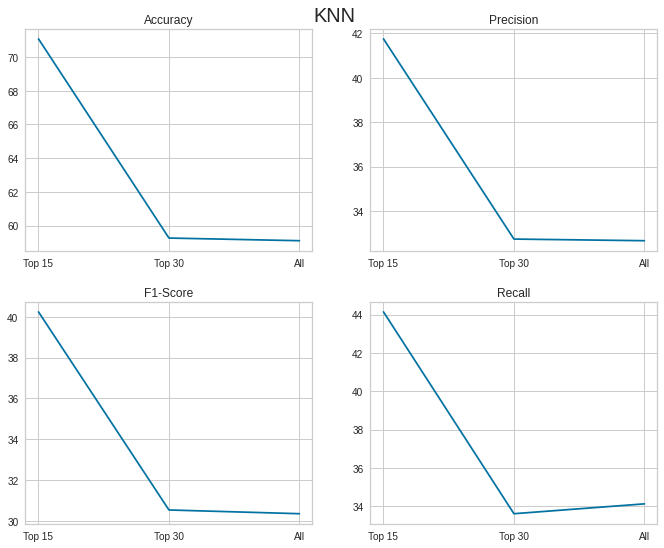

In [85]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accKNN10*100,accKNN20*100,accKNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preKNN10*100,preKNN20*100,preKNNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1KNN10*100,f1KNN20*100,f1KNNall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reKNN10*100,reKNN20*100,reKNNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('KNN',fontsize=20)

plt.show()

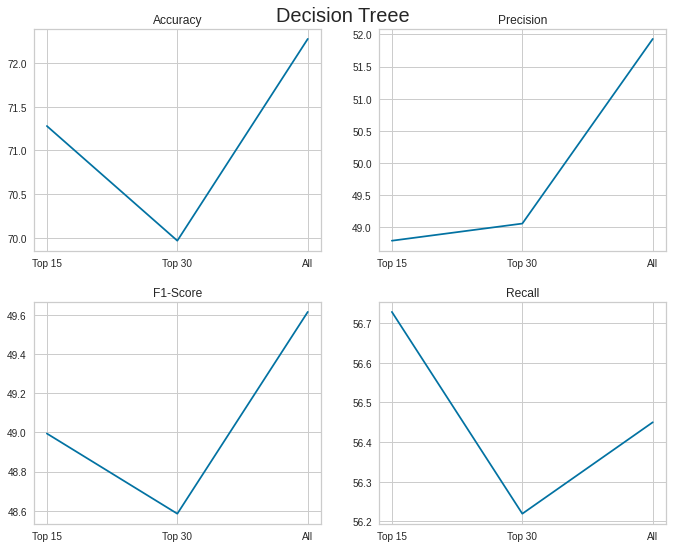

In [86]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Decision Treee',fontsize=20)

plt.show()

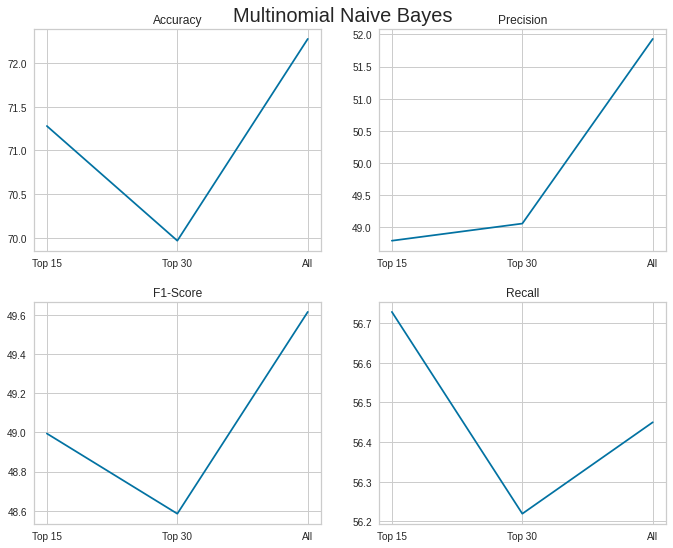

In [87]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accDT10*100,accDT20*100,accDTall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preDT10*100,preDT20*100,preDTall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1DT10*100,f1DT20*100,f1DTall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reDT10*100,reDT20*100,reDTall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Multinomial Naive Bayes',fontsize=20)

plt.show()

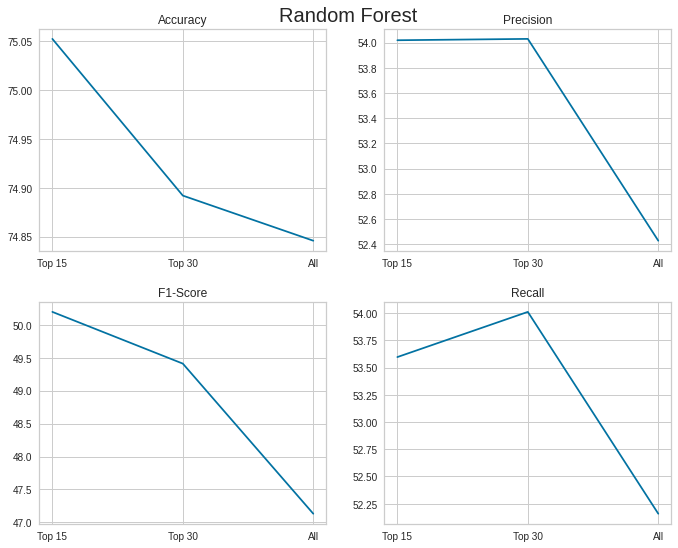

In [88]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accclfRF_10*100,accclfRF_20*100,accclfRF_all*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preclfRF_10*100,preclfRF_20*100,preclfRF_all*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1clfRF_10*100,f1clfRF_20*100,f1clfRF_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reclfRF_10*100,reclfRF_20*100,reclfRF_all*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Random Forest',fontsize=20)

plt.show()

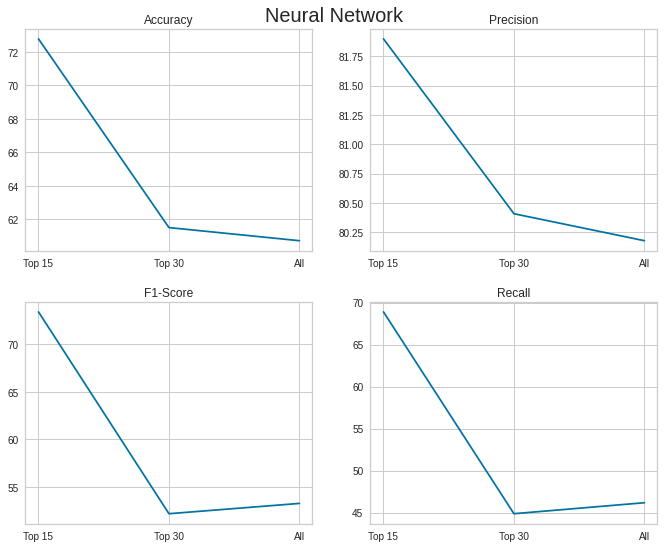

In [89]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accNN10*100,accNN20*100,accNNall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[precision_NN10*100,precision_NN20*100,precision_NNall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1_score_NN10*100,f1_score_NN20*100,f1_score_NNall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[recall_NN10*100,recall_NN20*100,recall_NNall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Neural Network',fontsize=20)

plt.show()

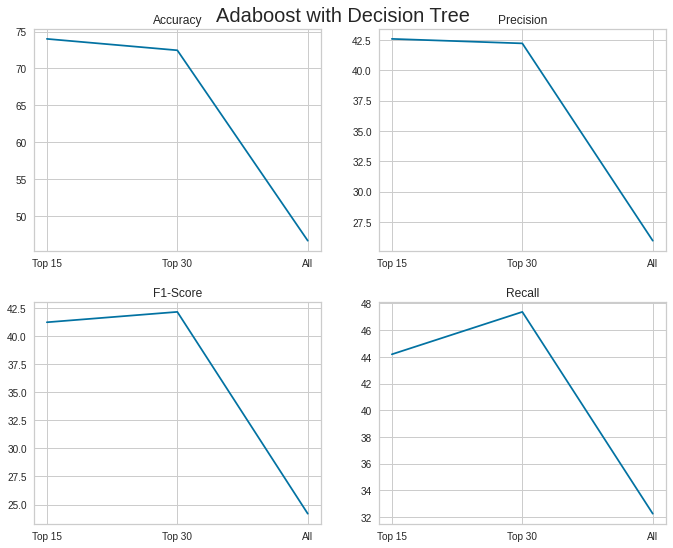

In [90]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accabc10*100,accabc20*100,accabcall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preabc10*100,preabc20*100,preabcall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1abc10*100,f1abc20*100,f1abcall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reabc10*100,reabc20*100,reabcall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Adaboost with Decision Tree',fontsize=20)

plt.show()

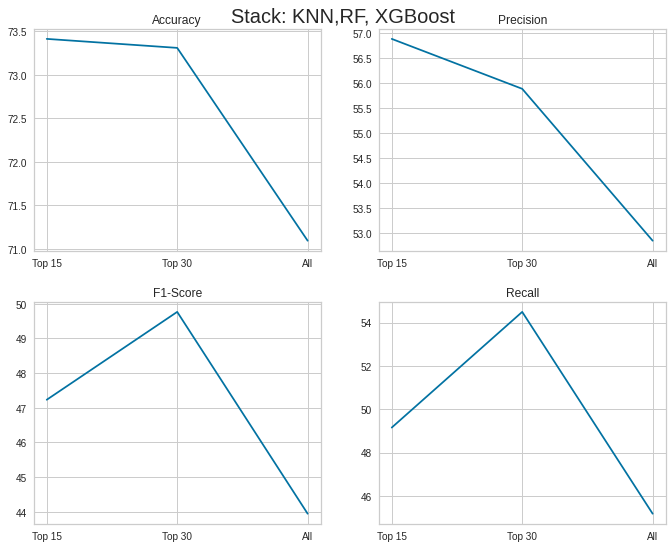

In [91]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[accXGB10*100,accXGB20*100,accXGBall*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[preXGB10*100,preXGB20*100,preXGBall*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1XGB10*100,f1XGB20*100,f1XGBall*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[reXGB10*100,reXGB20*100,reXGBall*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Stack: KNN,RF, XGBoost',fontsize=20)

plt.show()

NameError: ignored

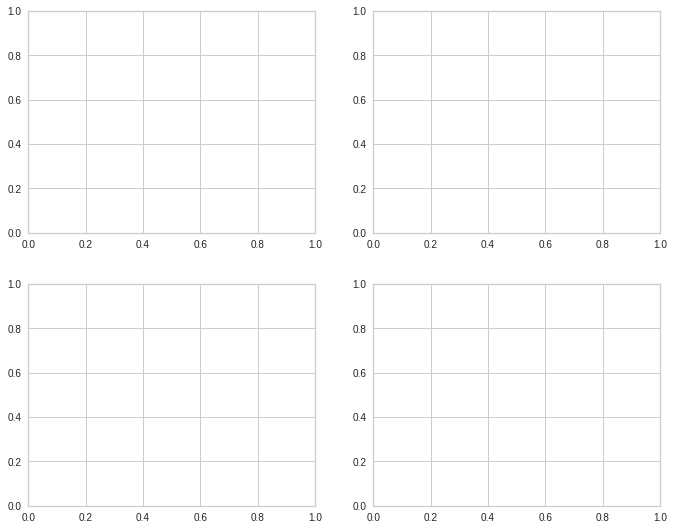

In [92]:
fig,a =  plt.subplots(2,2,figsize=(10, 8))
fig.tight_layout(pad=3)
a[0][0].plot(['Top 15', 'Top 30', 'All'],[acclogisticRegr_10*100,acclogisticRegr_20*100,acclogisticRegr_all*100])
a[0][0].set_title('Accuracy')
a[0][1].plot(['Top 15', 'Top 30', 'All'],[prelogisticRegr_10*100,prelogisticRegr_20*100,prelogisticRegr_all*100])
a[0][1].set_title('Precision')
a[1][0].plot(['Top 15', 'Top 30', 'All'],[f1logisticRegr_10*100,f1logisticRegr_20*100,f1logisticRegr_all*100])
a[1][0].set_title('F1-Score')
a[1][1].plot(['Top 15', 'Top 30', 'All'],[relogisticRegr_10*100,relogisticRegr_20*100,relogisticRegr_all*100])
a[1][1].set_title('Recall')
#figure.tight_layout(pad=3.0)
plt.suptitle('Logistic Regression Classifier',fontsize=20)

plt.show()

Accuracy


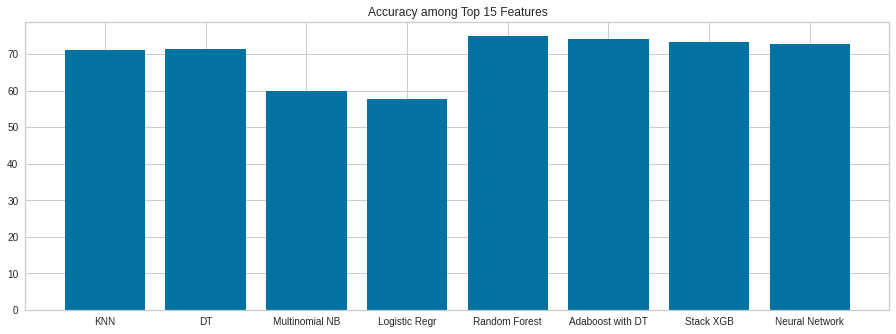

Precision


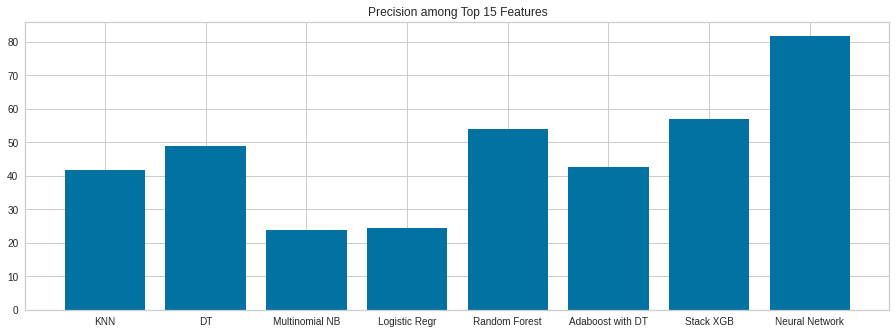

F1 Score


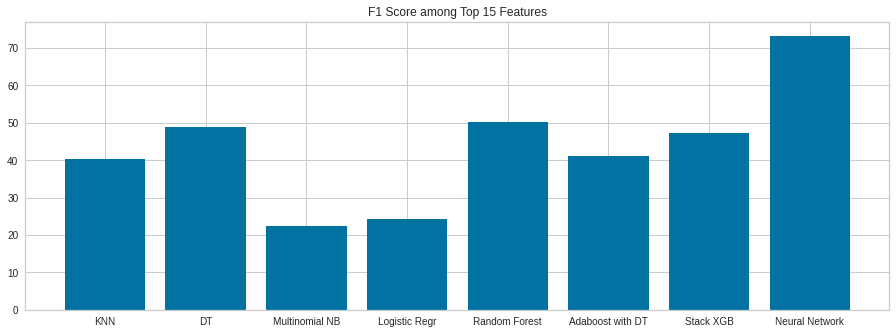

Recall


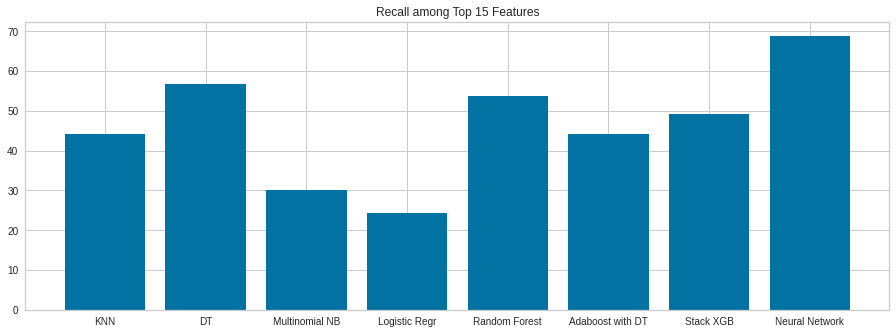

In [93]:
#Accuracy
print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNN10*100,accDT10*100,accbayes_10*100,acclogisticRegr_10*100,accclfRF_10*100,accabc10*100,accXGB10*100,accNN10*100]
ax.bar(algo,acc)
plt.title("Accuracy among Top 15 Features")
plt.show()
#Precision
print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNN10*100,preDT10*100,prebayes_10*100,prelogisticRegr_10*100,preclfRF_10*100,preabc10*100,preXGB10*100,precision_NN10*100]
ax.bar(algo,pre)
plt.title("Precision among Top 15 Features")
plt.show()
#F1 Score
print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNN10*100,f1DT10*100,f1bayes_10*100,prelogisticRegr_10*100,f1clfRF_10*100,f1abc10*100,f1XGB10*100,f1_score_NN10*100]
ax.bar(algo,f1)
plt.title("F1 Score among Top 15 Features")
plt.show()
#Recall
print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNN10*100,reDT10*100,rebayes_10*100,prelogisticRegr_10*100,reclfRF_10*100,reabc10*100,reXGB10*100,recall_NN10*100]
ax.bar(algo,re)
plt.title("Recall among Top 15 Features")
plt.show()

In [ ]:
#Accuracy
#print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNN20*100,accDT20*100,accbayes_20*100,acclogisticRegr_20*100,accclfRF_20*100,accabc20*100,accXGB20*100,accNN20*100]
ax.bar(algo,acc)
plt.title("Accuracy among Top 30 Features")
plt.show()
#Precision
#print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNN20*100,preDT20*100,prebayes_20*100,prelogisticRegr_20*100,preclfRF_20*100,preabc20*100,preXGB20*100,precision_NN20*100]
ax.bar(algo,pre)
plt.title("Precision among Top 30 Features")
plt.show()
#F1 Score
#print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNN20*100,f1DT20*100,f1bayes_20*100,prelogisticRegr_20*100,f1clfRF_20*100,f1abc20*100,f1XGB20*100,f1_score_NN20*100]
ax.bar(algo,f1)
plt.title("F1 Score among Top 30 Features")
plt.show()
#Recall
#print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNN20*100,reDT20*100,rebayes_20*100,prelogisticRegr_20*100,reclfRF_20*100,reabc20*100,reXGB20*100,recall_NN20*100]
ax.bar(algo,re)
plt.title("Recall among Top 30 Features")
plt.show()

In [ ]:
#Accuracy
#print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNNall*100,accDTall*100,accbayes_all*100,acclogisticRegr_all*100,accclfRF_all*100,accabcall*100,accXGBall*100,accNNall*100]
ax.bar(algo,acc)
plt.title("Accuracy among All Features")
plt.show()
#Precision
#print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
pre = [preKNNall*100,preDTall*100,prebayes_all*100,prelogisticRegr_all*100,preclfRF_all*100,preabcall*100,preXGBall*100,precision_NNall*100]
ax.bar(algo,pre)
plt.title("Precision among All Features")
plt.show()
#F1 Score
#print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
f1 = [f1KNNall*100,f1DTall*100,f1bayes_all*100,prelogisticRegr_all*100,f1clfRF_all*100,f1abcall*100,f1XGBall*100,f1_score_NNall*100]
ax.bar(algo,f1)
plt.title("F1 Score among All Features")
plt.show()
#Recall
#print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
re = [reKNNall*100,reDTall*100,rebayes_all*100,prelogisticRegr_all*100,reclfRF_all*100,reabcall*100,reXGBall*100,recall_NNall*100]
ax.bar(algo,re)
plt.title("Recall among All Features")
plt.show()

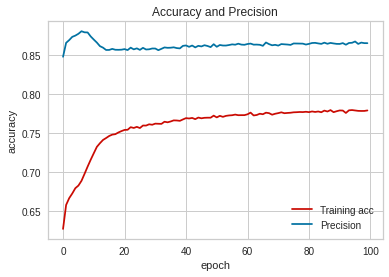

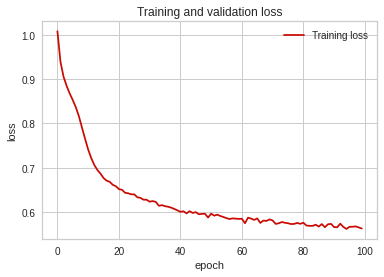

In [104]:
#Graphing our training and validation
acc_NN_10 = historyNN10.history['accuracy']
pre_NN10 = historyNN10.history['precision_m']
loss_NN_10 = historyNN10.history['loss']
#val_loss = historyNN10.history['val_loss']
epochs_NN_10 = range(len(acc_NN_10))
plt.plot(epochs_NN_10, acc_NN_10, 'r', label='Training acc')
plt.plot(epochs_NN_10, pre_NN10, 'b', label='Precision')
plt.title('Accuracy and Precision')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs_NN_10, loss_NN_10, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [105]:
print(historyNN10.history['precision_m'])

[0.8477693796157837, 0.8656579852104187, 0.869186282157898, 0.873357892036438, 0.8749716281890869, 0.8772954940795898, 0.8805616497993469, 0.8791680335998535, 0.8790189027786255, 0.8738687634468079, 0.8698446750640869, 0.8660010695457458, 0.8614155054092407, 0.8594884872436523, 0.8564972281455994, 0.8565306067466736, 0.8578956723213196, 0.8567858934402466, 0.8567011952400208, 0.8568633198738098, 0.8576096296310425, 0.8563327789306641, 0.8594986796379089, 0.8572729229927063, 0.8585804104804993, 0.8566304445266724, 0.8592347502708435, 0.8571240305900574, 0.8573586940765381, 0.8584063649177551, 0.8583577871322632, 0.8562154769897461, 0.8579775094985962, 0.8597691655158997, 0.8592684864997864, 0.859406054019928, 0.859917402267456, 0.8589200973510742, 0.8585304021835327, 0.8617926239967346, 0.8623030781745911, 0.8605366945266724, 0.862213671207428, 0.859809160232544, 0.8618291616439819, 0.8610557913780212, 0.8626043200492859, 0.8616312742233276, 0.8601713180541992, 0.8639248609542847, 0.860

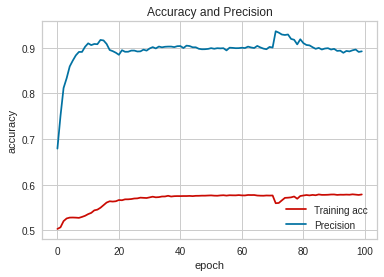

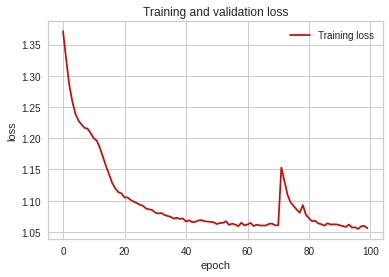

In [106]:
#Graphing our training and validation
acc_NN_20 = historyNN20.history['accuracy']
pre_NN20 = historyNN20.history['precision_m']
loss_NN_20 = historyNN20.history['loss']
#val_loss = historyNN10.history['val_loss']
epochs_NN_20 = range(len(acc_NN_20))
plt.plot(epochs_NN_20, acc_NN_20, 'r', label='Training acc')
plt.plot(epochs_NN_20, pre_NN20, 'b', label='Precision')
plt.title('Accuracy and Precision')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs_NN_20, loss_NN_20, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

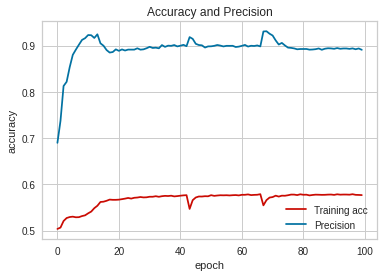

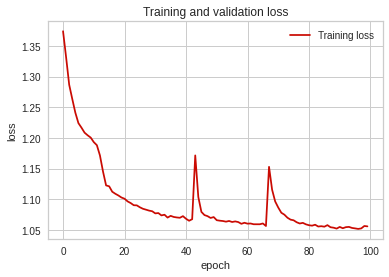

In [107]:
#Graphing our training and validation
acc_NN_all = historyNNall.history['accuracy']
pre_NNall = historyNNall.history['precision_m']
loss_NN_all = historyNNall.history['loss']
#val_loss = historyNN10.history['val_loss']
epochs_NN_all = range(len(acc_NN_all))
plt.plot(epochs_NN_all, acc_NN_all, 'r', label='Training acc')
plt.plot(epochs_NN_all, pre_NNall, 'b', label='Precision')
plt.title('Accuracy and Precision')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs_NN_all, loss_NN_all, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [108]:
import cufflinks as cf
cf.go_offline()
import plotly.graph_objs as go
import plotly.offline as pyo

In [96]:
algo = ['KNN', 'DT', 'Multinomial NB', 'Logistic Regr','Random Forest',"Adaboost with DT","Stack XGB","Neural Network"]
acc = [accKNN10*100,accDT10*100,accbayes_10*100,acclogisticRegr_10*100,accclfRF_10*100,accabc10*100,accXGB10*100,accNN10*100]
fig = go.Figure([go.Scatter(x=algo, y=acc)])
pyo.plot(fig)

'temp-plot.html'

In [121]:
import plotly.express as px
fig = px.bar(x=algo, y=acc, barmode='overlay')
pyo.plot(fig)

'temp-plot.html'